<a href="https://colab.research.google.com/github/ItoroKoffi/SCAMP-Cohort6-Technical-Assessment/blob/master/Fake_job_Posting_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fake Job Posting Detection**

By Itoro Koffi

Machine learning-based classification approaches to detecting fraudulent job postings using Support Vector Machine and RandomForest Classifiers.

In [ ]:
#importing necessary libraries
import re
import string
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [ ]:
#importing dataset
from google.colab import files
uploaded = files.upload()

Saving fake_job_postings.csv to fake_job_postings.csv


In [ ]:
#importing  pandas for DataFrame
import pandas as pd

In [ ]:
#converting imported dataset into dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['fake_job_postings.csv']))

In [ ]:
#checking shape of data 
#17880 rows and 18 columns
df.shape

(17880, 18)

In [ ]:
#viewing columns with null values
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
#deleting irrelevant columns
columns= ["job_id", "telecommuting", "has_company_logo", "salary_range", "has_questions", "employment_type"]
for colu in columns:
  del df[colu]


In [ ]:
#view first five rows of data
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
#fill NaN with blank
df.fillna("",inplace=True)

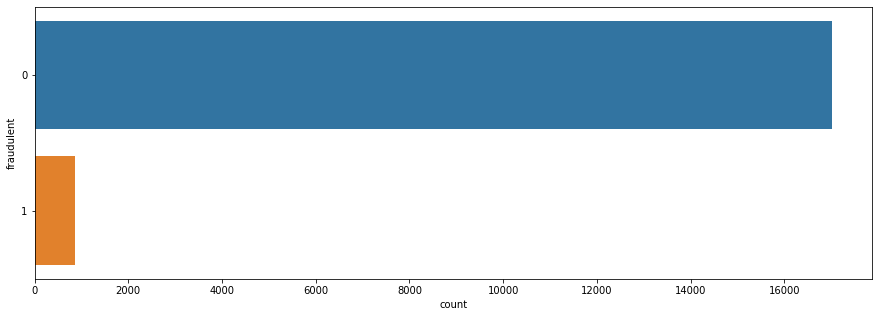

In [ ]:
#plot of fraudulent and non-fraudulent postings
#fraudulent=1
#non-fraudulent=0
plt.figure(figsize=(15,5))
sns.countplot(y="fraudulent", data=df)
plt.show()

In [ ]:
#view first five rows of data
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
#Count of number of fraudulent and non-frauduent postings
df.groupby("fraudulent")["fraudulent"].count()

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

In [ ]:
#delete rows with blanks in required experience column
exp=dict(df.required_experience.value_counts())
del exp[""]

In [ ]:
#visualizing experience column
exp

{'Associate': 2297,
 'Director': 389,
 'Entry level': 2697,
 'Executive': 141,
 'Internship': 381,
 'Mid-Senior level': 3809,
 'Not Applicable': 1116}

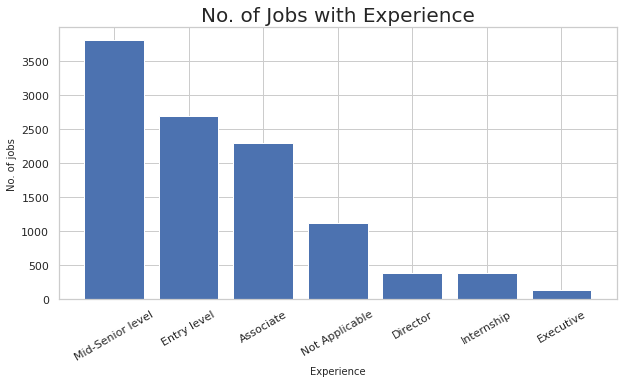

In [ ]:
#Plot of number of jobs posted vs experience
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
plt.bar(exp.keys(),exp.values())
plt.title("No. of Jobs with Experience", size=20)
plt.xlabel("Experience", size=10)
plt.ylabel("No. of jobs", size =10)
plt.xticks(rotation=30)
plt.show()

In [ ]:
#Extraction of Country name from location column
def split(location):
  l=location.split(",")
  return l[0]
df["country"]=df.location.apply(split)

In [ ]:
#visualizing dataset
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [ ]:
# Count of jobs posted for top 14 countries and delete blanks
countr=dict(df.country.value_counts()[:14])
del countr[""]
countr

{'AU': 214,
 'BE': 117,
 'CA': 457,
 'DE': 383,
 'GB': 2384,
 'GR': 940,
 'IE': 114,
 'IN': 276,
 'NL': 127,
 'NZ': 333,
 'PH': 132,
 'SG': 80,
 'US': 10656}

Text(0, 0.5, 'Countries')

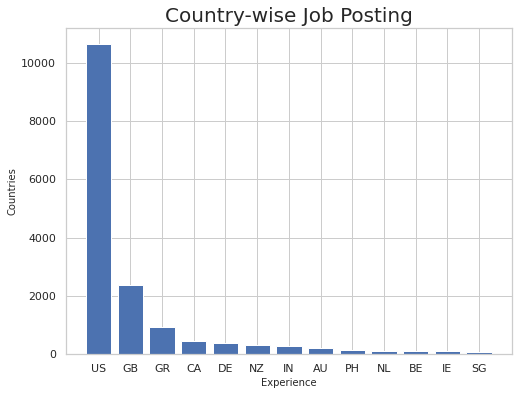

In [ ]:
# Plot of Job posted vs countries
plt.figure(figsize=(8,6))
plt.bar(countr.keys(),countr.values())
plt.title("Country-wise Job Posting", size=20)
plt.xlabel("Experience", size=10)
plt.ylabel("Countries", size =10)

In [ ]:
#delete rows in education with blanks and visualize
edu=dict(df.required_education.value_counts()[:7])
del edu[""]
edu

{'Associate Degree': 274,
 "Bachelor's Degree": 5145,
 'Certification': 170,
 'High School or equivalent': 2080,
 "Master's Degree": 416,
 'Unspecified': 1397}

Text(0, 0.5, 'Education')

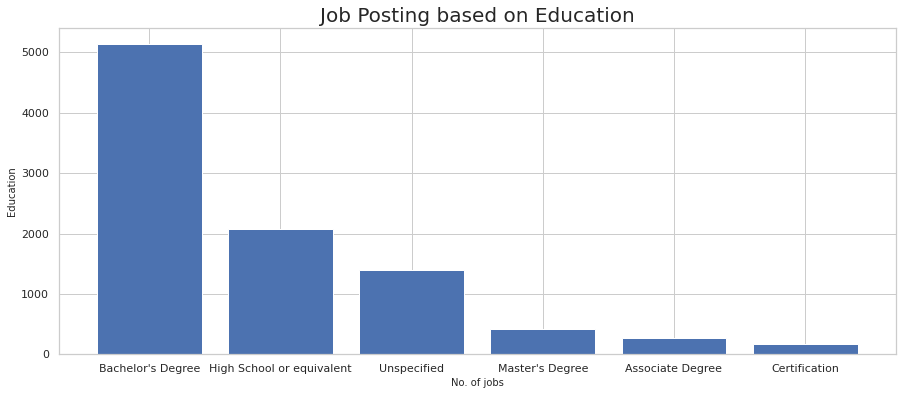

In [ ]:
# Plot of Job posted vs Education
plt.figure(figsize=(15,6))
plt.bar(edu.keys(),edu.values())
plt.title("Job Posting based on Education", size=20)
plt.xlabel("No. of jobs", size=10)
plt.ylabel("Education", size =10)

In [ ]:
#visualization of top 10 job titles for non-fraudulent jobs
print (df[df.fraudulent==0].title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [ ]:
#visualization of top 10 job titles for fraudulent jobs
print (df[df.fraudulent==1].title.value_counts()[:10])

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: title, dtype: int64


In [ ]:
#Combine all text columns into a single column
df['text']= df['title']+''+df['company_profile']+''+df['description']+''+df['benefits']+''+df['requirements']
#Delete preexisting text columns
del df['title']
del df['location']
del df['department']
del df['description']
del df['requirements']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']
del df['country']

In [ ]:
df.head()

,company_profile,benefits,fraudulent,text
0,"We're Food52, and we've created a groundbreaki...",,0,"Marketing InternWe're Food52, and we've create..."
1,"90 Seconds, the worlds Cloud Video Production ...",What you will get from usThrough being part of...,0,Customer Service - Cloud Video Production90 Se...
2,Valor Services provides Workforce Solutions th...,,0,Commissioning Machinery Assistant (CMA)Valor S...
3,Our passion for improving quality of life thro...,Our culture is anything but corporate—we have ...,0,Account Executive - Washington DCOur passion f...
4,SpotSource Solutions LLC is a Global Human Cap...,Full Benefits Offered,0,Bill Review ManagerSpotSource Solutions LLC is...


In [ ]:
del df['company_profile']
del df['benefits']
#visualizing dataset
df.head()

,fraudulent,text
0,0,"Marketing InternWe're Food52, and we've create..."
1,0,Customer Service - Cloud Video Production90 Se...
2,0,Commissioning Machinery Assistant (CMA)Valor S...
3,0,Account Executive - Washington DCOur passion f...
4,0,Bill Review ManagerSpotSource Solutions LLC is...


In [ ]:
#Storing fraudulent and non-fraudulent job texts into variables
fraudjobs_text=df[df.fraudulent==1].text
realjobs_text=df[df.fraudulent==0].text

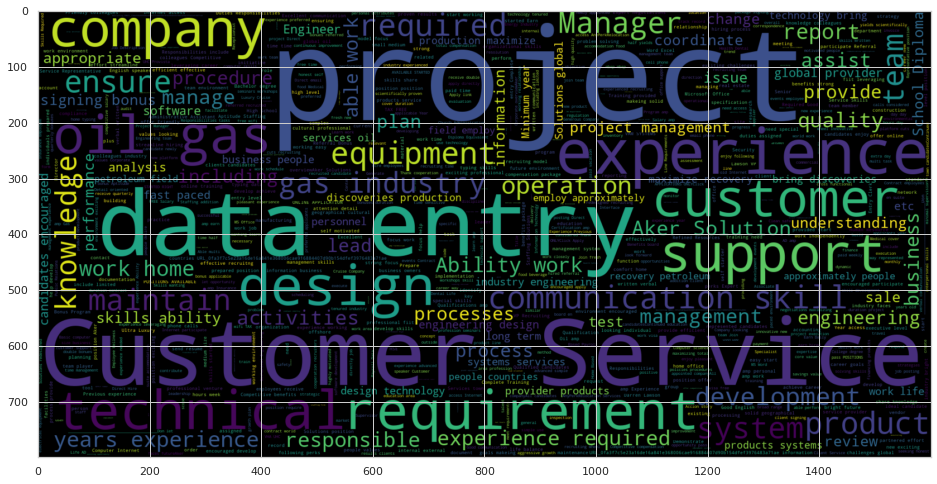

In [ ]:
#Creating word cloud for fraudulent jobs
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(16,14))
wc=WordCloud(min_font_size=3, max_words=3000, width=1600, height=800, stopwords=STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation="bilinear")

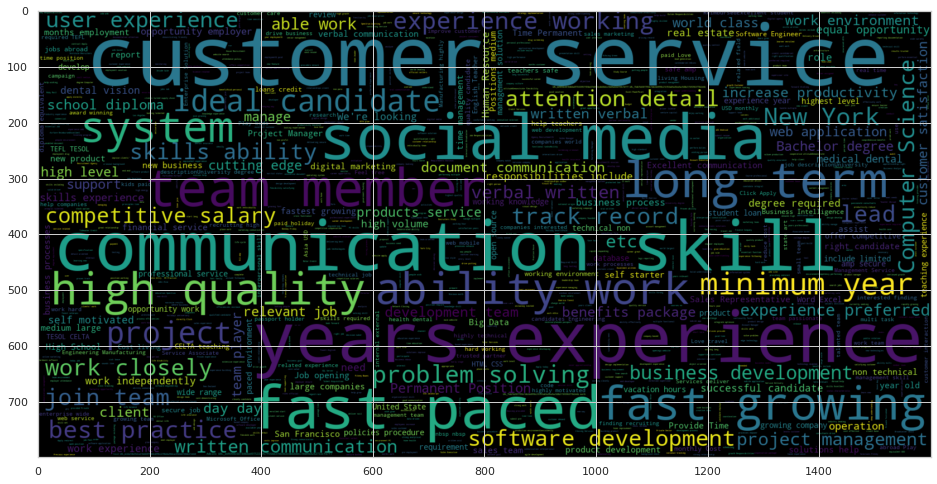

In [ ]:
#Creating word cloud for non-fraudulent jobs
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(16,14))
wc=WordCloud(min_font_size=3, max_words=3000, width=1600, height=800, stopwords=STOPWORDS).generate(str(" ".join(realjobs_text)))
plt.imshow(wc,interpolation="bilinear")

In [ ]:
#create list of punctuation marks
punctuations=string.punctuation

#create list of stopwords
nlp=spacy.load("en_core_web_sm")
stop_words=spacy.lang.en.stop_words.STOP_WORDS

#Load English tokenizer, tagger, parser, NER and word vectors
parser=English()

# Create tokenizer function
def spacy_tokenizer(sentence):
    mytokens=parser(sentence)

    # Lemmatizing each token and converting to lowercase
    mytokens=[word.lemma_.lower().strip()if word.lemma_ !="-PRON-" else word.lower_ for word in mytokens]
    

    # Removing stop words
    mytokens=[word for word in mytokens if word not in stop_words and word not in punctuations]
    
    # return a preprocessed list of tokens
    return mytokens

# Custom transformer using spaCy
class predictors(TransformerMixin):
  def transform(self,X,**transfrom_params):

      # Cleaning Text
      return[clean_text(text) for text in X]
  def fit(self,X,y=None, **fit_params):
      return self
  def get_params(self,deep=True):
      return{}

      
# Basic function to clean the text
def clean_text(text):
      return text.strip().lower()


In [ ]:
from sklearn.svm import SVC

In [ ]:
# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(df.text, df.fraudulent, test_size=0.3)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12516,)
(12516,)
(5364,)
(5364,)


In [ ]:
#Support Vector Machine Classifier
# Create pipeline
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,3))),
                 ('classifier', SVC())])

#Training the model.
pipe.fit(X_train,y_train)


Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7f641244d510>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 3),
                                 tokenizer=<function spacy_tokenizer at 0x7f64421dc200>)),
                ('classifier', SVC())])

In [ ]:
#Predicting with a test dataset
y_pred = pipe.predict(X_test)

# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred))

Classification Accuracy: 0.9798657718120806
Classification Report

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5136
           1       1.00      0.53      0.69       228

    accuracy                           0.98      5364
   macro avg       0.99      0.76      0.84      5364
weighted avg       0.98      0.98      0.98      5364

Confusion Matrix

[[5136    0]
 [ 108  120]]


In [ ]:
#Random forest Classifer

In [ ]:
#Clean dataset
df["text"]=df["text"].apply(clean_text)

In [ ]:
#Apply Tfidf Vectorizer
cv=TfidfVectorizer(max_features=100)
x=cv.fit_transform(df["text"])
df1=pd.DataFrame(x.toarray(), columns=cv.get_feature_names())
df.drop(["text"],axis=1,inplace=True)
main_df=pd.concat([df1,df],axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#visualizing newly created DataFrame to see frequency of word appearance
main_df.head()

,ability,about,all,also,amp,an,and,are,as,at,...,who,will,with,work,working,world,years,you,your,fraudulent
0,0.000000,0.041571,0.000000,0.042595,0.036633,0.000000,0.758230,0.000000,0.079164,0.000000,...,0.000000,0.000000,0.186836,0.051285,0.068354,0.000000,0.000000,0.000000,0.000000,0
1,0.021889,0.094759,0.035379,0.024274,0.041752,0.029793,0.490480,0.056601,0.060151,0.052621,...,0.000000,0.077980,0.165622,0.043838,0.116858,0.099277,0.000000,0.204766,0.130452,0
2,0.000000,0.000000,0.176827,0.000000,0.041735,0.089342,0.396899,0.113158,0.000000,0.000000,...,0.000000,0.062359,0.307463,0.058428,0.000000,0.000000,0.000000,0.094470,0.074515,0
3,0.023303,0.000000,0.018832,0.000000,0.000000,0.095150,0.696211,0.000000,0.032018,0.037347,...,0.023196,0.049810,0.075565,0.046670,0.000000,0.105689,0.019827,0.050306,0.059519,0
4,0.000000,0.000000,0.068016,0.000000,0.040133,0.028637,0.606168,0.081610,0.115637,0.000000,...,0.000000,0.000000,0.159201,0.028092,0.037443,0.000000,0.035804,0.030281,0.107481,0


In [ ]:
#Split Data into test and train
Y=main_df.iloc[:,-1]
X=main_df.iloc[:,:-1]
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(12516, 100)
(5364, 100)
(12516,)
(5364,)


In [ ]:
#Applying RandomForest algorithm
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion="entropy")
model=rfc.fit(X_train,Y_train)

In [ ]:
#Prediction of test data
pred=rfc.predict(X_test)
score=accuracy_score(Y_test,pred)
score

0.9696122296793438

In [ ]:
#Print of Classification Report and confusion matrix
print("Classification Report\n")
print(classification_report(Y_test,pred))
print("Confusion Matrix/n")
print(confusion_matrix(Y_test,pred))

Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5087
           1       1.00      0.41      0.58       277

    accuracy                           0.97      5364
   macro avg       0.98      0.71      0.78      5364
weighted avg       0.97      0.97      0.96      5364

Confusion Matrix/n
[[5087    0]
 [ 163  114]]


**Conclusion**

Support Vector Classifier has given the accuracy score of 97.93%, and out of 5354 test observations, it has correctly predicted the class labels for 5245 job postings.

Randomforest Classifier has an accuracy score of 97.09%. and out of 5354 test observations, it has correctly predicted the class labels for 5202 job postings.